In [1]:
import numpy as np
import torch

from gene_graph_dataset import G3MedianDataset
from dcj_comp import dcj_dist

In [2]:
seqlen = 10
rate = 0.1
seqnum = 1000

In [7]:
filepath = (f'/share/g3median_datasets/dataset_archive/dataset_g3m_3_' 
            f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
            f'/raw/g3raw_' 
            f'{seqlen}_{int(seqlen * rate)}.pt')

In [8]:
filepath

'/share/g3median_datasets/dataset_archive/dataset_g3m_3_10_1_1000/raw/g3raw_10_1.pt'

In [9]:
seq = torch.load(filepath)

In [17]:
dist_res = []
for s in seq[0]:
    dist_res.append(dcj_dist(s[0], s[1])[-1] + dcj_dist(s[0], s[2])[-1] + dcj_dist(s[2], s[1])[-1])

In [21]:
print()
np.max(dist_res), np.average(dist_res), np.min(dist_res)

(6, 6.0, 6)

In [30]:
for i in range(1,10):
    print(i/10)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [27]:
print(range(1, 10))

range(1, 10)


In [42]:
for seqlen in [10, 20, 50, 100]:
    print(f'seqlen: {seqlen}')
    for rate in range(1, 10):
        rate = rate / 10
        print(f'\t rate: {rate}, \t max \t avg \t\t min \t std')
        for seqnum in [1000, 5000]:            
            filepath = (f'/share/g3median_datasets/dataset_archive/dataset_g3m_3_' 
            f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
            f'/raw/g3raw_' 
            f'{seqlen}_{int(seqlen * rate)}.pt')
            seq = torch.load(filepath)
            
            dist_res = []
            for s in seq[0]:
                dist_res.append(dcj_dist(s[0], s[1])[-1] + dcj_dist(s[0], s[2])[-1] + dcj_dist(s[2], s[1])[-1])
            if seqnum != len(dist_res):
                print(f'error, {seqnum}, {rate}')
            # print(f'seqnum: {seqnum}, resnum: {len(dist_res)}')
            print(f'\t {seqnum} \t\t {np.max(dist_res)}'
                  f'\t {np.average(dist_res):>7.3f} \t {np.min(dist_res)} \t {np.std(dist_res, dtype = np.float64):>8.4f}')

seqlen: 10
	 rate: 0.1, 	 max 	 avg 		 min 	 std
	 1000 		 6	   6.000 	 6 	   0.0000
	 5000 		 6	   6.000 	 6 	   0.0000
	 rate: 0.2, 	 max 	 avg 		 min 	 std
	 1000 		 12	   8.729 	 4 	   1.6797
	 5000 		 12	   8.762 	 2 	   1.7988
	 rate: 0.3, 	 max 	 avg 		 min 	 std
	 1000 		 18	  11.026 	 2 	   2.6984
	 5000 		 18	  11.160 	 4 	   2.7235
	 rate: 0.4, 	 max 	 avg 		 min 	 std
	 1000 		 22	  13.264 	 4 	   3.4854
	 5000 		 24	  13.205 	 4 	   3.4282
	 rate: 0.5, 	 max 	 avg 		 min 	 std
	 1000 		 25	  14.489 	 4 	   3.8267
	 5000 		 27	  14.503 	 4 	   3.8023
	 rate: 0.6, 	 max 	 avg 		 min 	 std
	 1000 		 25	  15.289 	 4 	   4.0259
	 5000 		 27	  15.396 	 4 	   3.9484
	 rate: 0.7, 	 max 	 avg 		 min 	 std
	 1000 		 29	  16.152 	 6 	   3.9851
	 5000 		 28	  15.928 	 4 	   4.0675
	 rate: 0.8, 	 max 	 avg 		 min 	 std
	 1000 		 27	  16.147 	 6 	   3.9224
	 5000 		 27	  16.306 	 4 	   4.0864
	 rate: 0.9, 	 max 	 avg 		 min 	 std
	 1000 		 27	  16.553 	 4 	   3.9554
	 5000 		 27	  16.51

In [40]:
f'{5.3:>7.3f}'

'  5.300'

In [48]:
for rate in list(range(1, 10)) + [10, 15, 20]:
    rate = rate / 10
    print(f'rate: {rate}, \t max \t avg \t std')
    for seqlen in [10, 50, 100]:
        # print(f'seqlen: {seqlen}')        
        seqnum = 200           
        filepath = (f'val_seq_g3m_3_' 
        f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
        f'/raw/g3raw_' 
        f'{seqlen}_{int(seqlen * rate)}.pt')
        seq = torch.load(filepath)

        dist_res = []
        for s in seq[0]:
            dist_res.append(dcj_dist(s[0], s[1])[-1] + dcj_dist(s[0], s[2])[-1] + dcj_dist(s[2], s[1])[-1])
        if seqnum != len(dist_res):
            print(f'error, {seqnum}, {rate}')
        # print(f'seqnum: {seqnum}, resnum: {len(dist_res)}')
        print(#f'\t {seqnum}' 
              f'\t\t {np.max(dist_res)} \t {np.average(dist_res):>7.3f}' #' \t {np.min(dist_res)}')
              f'\t {np.std(dist_res, dtype=np.float64):>8.4f}')

rate: 0.1, 	 max 	 avg 	 std
		 6 	   6.000	   0.0000
		 27 	  18.250	   4.4031
		 58 	  33.960	   9.8203
rate: 0.2, 	 max 	 avg 	 std
		 12 	   8.220	   1.8952
		 58 	  31.165	  10.3411
		 106 	  63.700	  19.0074
rate: 0.3, 	 max 	 avg 	 std
		 18 	  11.605	   2.6625
		 78 	  45.490	  13.9589
		 159 	  90.845	  30.3130
rate: 0.4, 	 max 	 avg 	 std
		 24 	  13.725	   3.4175
		 91 	  51.350	  17.1935
		 162 	  91.015	  29.0437
rate: 0.5, 	 max 	 avg 	 std
		 23 	  13.815	   3.4250
		 95 	  55.895	  17.2440
		 183 	 110.270	  31.7669
rate: 0.6, 	 max 	 avg 	 std
		 25 	  14.910	   4.3246
		 99 	  59.555	  17.1676
		 169 	 100.645	  30.3667
rate: 0.7, 	 max 	 avg 	 std
		 25 	  15.590	   4.0227
		 89 	  56.475	  15.7731
		 191 	 113.040	  32.4387
rate: 0.8, 	 max 	 avg 	 std
		 26 	  17.110	   4.1567
		 105 	  60.570	  17.7886
		 175 	 108.775	  29.9592
rate: 0.9, 	 max 	 avg 	 std
		 25 	  16.915	   3.7826
		 100 	  57.250	  18.0066
		 197 	 118.905	  34.4956
rate: 1.0, 	 max 	 avg 	 std

In [49]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [50]:
import matplotlib.pyplot as plt

In [91]:
dist_res = []
for seqlen in [10, 50, 100]:
    seqnum = 200
    tmp = []
    rate = 2.0
    # seqlen = 10
    filepath = (f'val_seq_g3m_3_' 
    f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
    f'/raw/g3raw_' 
    f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(filepath)


    for s in seq[0]:
        tmp += [dcj_dist(s[0], s[1])[-1], dcj_dist(s[0], s[2])[-1], dcj_dist(s[2], s[1])[-1]]
    dist_res.append([t/seqlen * 10 for t in tmp])

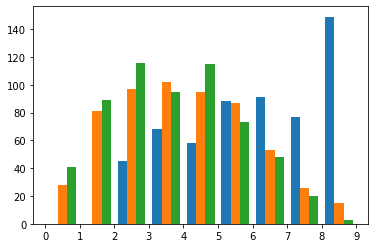

In [93]:
x = np.arange(10)
plt.figure()
H = plt.hist(dist_res, bins = np.arange(10))
plt.xticks(x)
# plt.xticklabels(x)
plt.savefig('g3val_dataset.svg', bbox_inches = 'tight')
plt.show()

In [ ]:
# labels = [0, 1,2,3,4,5,6,7,8,9]
# x = np.arange(10)  # the label locations
# width = 0.35  # the width of the bars

# # d3 = H[0][0]/sum(H[0][0])*100
# # d4 = H[0][1]/sum(H[0][1])*100
# # d3[1] = 0
# # d4[1] = 0

# n3 = H[0][0].copy()
# n4 = H[0][1].copy()
# n3[1] = 0
# n4[1] = 0
# figure(figsize = (10,16), dpi=90)

# fig, ax = plt.subplots(2,1)
# rec1 = ax[0].bar(x - width/2,  n3[1:7]*1.546, width, label='D3106')
# rec2 = ax[0].bar(x + width/2,  n4[1:7], width, label='D4802')

# ax[0].set_ylabel('Number of Samples')
# ax[0].set_xlabel('Cellulars')
# ax[0].set_title('Number of Cellular')
# ax[0].set_xticks(x)
# ax[0].set_xticklabels(labels)
# ax[0].legend()

# # ax.bar_label(rec1, padding=3)
# # ax.bar_label(rec2, padding=3)

# # d3 = H[0][0]/sum(H[0][0][2:])*100
# # d4 = H[0][1]/sum(H[0][1][2:])*100
# # d3[1] = 0
# # d4[1] = 0

# # rec1 = ax[1].bar(x - width/2,  d3[1:7], width, label='D3106')
# # rec2 = ax[1].bar(x + width/2,  d4[1:7], width, label='D4802')

# # ax[1].set_ylabel('Percent(%)')
# # ax[1].set_xlabel('Cellulars')
# # # ax.set_title('Sample Distribution')
# # ax[1].set_xticks(x)
# # ax[1].set_xticklabels(labels)
# # ax[1].legend()


# plt.show()

In [94]:
dist_res = []
for seqlen in [10, 20, 50, 100]:
    seqnum = 1000
    tmp = []
    rate = 0.9
    # seqlen = 10
    filepath = (f'/share/g3median_datasets/dataset_archive/dataset_g3m_3_' 
    f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
    f'/raw/g3raw_' 
    f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(filepath)


    for s in seq[0]:
        tmp += [dcj_dist(s[0], s[1])[-1], dcj_dist(s[0], s[2])[-1], dcj_dist(s[2], s[1])[-1]]
    dist_res.append([t/seqlen * 10 for t in tmp])

In [95]:
np.array(dist_res).shape

(4, 3000)

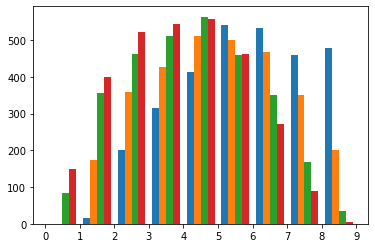

In [96]:
x = np.arange(10)
plt.figure()
H = plt.hist(dist_res, bins = np.arange(10))
plt.xticks(x)
# plt.xticklabels(x)
plt.savefig('g3t1000_dataset.svg', bbox_inches = 'tight')
plt.show()

In [97]:
dist_res = []
for seqlen in [10, 20, 50, 100]:
    seqnum = 5000
    tmp = []
    rate = 0.9
    # seqlen = 10
    filepath = (f'/share/g3median_datasets/dataset_archive/dataset_g3m_3_' 
    f'{seqlen}_{int(seqlen * rate)}_{seqnum}' 
    f'/raw/g3raw_' 
    f'{seqlen}_{int(seqlen * rate)}.pt')
    seq = torch.load(filepath)


    for s in seq[0]:
        tmp += [dcj_dist(s[0], s[1])[-1], dcj_dist(s[0], s[2])[-1], dcj_dist(s[2], s[1])[-1]]
    dist_res.append([t/seqlen * 10 for t in tmp])

In [98]:
np.array(dist_res).shape

(4, 15000)

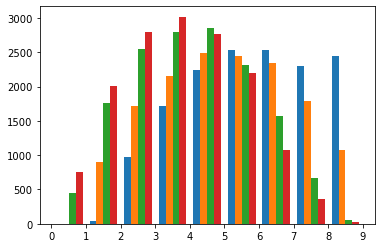

In [99]:
x = np.arange(10)
plt.figure()
H = plt.hist(dist_res, bins = np.arange(10))
plt.xticks(x)
# plt.xticklabels(x)
plt.savefig('g3t5000_dataset.svg', bbox_inches = 'tight')
plt.show()